# ***1. Foundational Knowledge***

   - Understand the principles of Convolutional Neural Networks (CNNs) and how they are used for image classification tasks.
   - Familiarize yourself with the architecture of CNNs, including convolutional layers, pooling layers, and fully connected layers.
   - Recognize different activation functions (e.g., ReLU, sigmoid, tanh) and their impact on CNN performance.


# **1. Principles of Convolutional Neural Networks (CNNs)**

**What is a CNN?**
A Convolutional Neural Network (CNN) is a type of deep learning model specifically designed to process structured grid data like images. Unlike traditional fully connected networks, CNNs leverage spatial hierarchies in images by applying convolutional filters to extract features.


**Why CNNs for image classification?**
Images have spatial relationships — pixels close to each other usually form patterns like edges, shapes, or textures. CNNs exploit these local connections to learn spatial hierarchies automatically, making them very effective for image tasks.

**Key ideas:**

Local receptive fields: Instead of connecting every neuron to all input pixels (like in dense layers), CNN neurons connect only to a small region (patch) of the input image, called the receptive field. This helps detect local features like edges or corners.

Parameter sharing: The same convolutional filter (kernel) is applied across the entire image, reducing the number of parameters drastically compared to fully connected layers.

Feature hierarchy: Early layers learn low-level features (edges, corners), while deeper layers learn complex patterns (faces, objects).

# **2. CNN Architecture Components**
A typical CNN architecture consists of several types of layers stacked together:

**a) Convolutional Layers (Conv Layers)**
Function: Apply filters/kernels over the input image to produce feature maps.

Operation: A filter (small matrix of weights, e.g., 3x3 or 5x5) slides (convolves) over the input, performing element-wise multiplication and summation to detect specific features.

Output: A set of feature maps representing the presence of learned features in the input.


**b) Activation Functions**
Applied after convolution to introduce non-linearity (more on this below).


**c) Pooling Layers (Downsampling)**
Purpose: Reduce the spatial dimensions (width, height) of feature maps while keeping the most important information. This reduces computation and controls overfitting.

Common types:

*Max Pooling:* Takes the maximum value in a window (e.g., 2x2)

*Average Pooling:* Takes the average value in the window

Effect: Makes the representation smaller and more manageable but still captures essential features.


**d) Fully Connected (Dense) Layers**
Towards the end of the network, after several convolution and pooling layers, fully connected layers treat the extracted features as input for classification or regression tasks.

They connect every neuron in the layer to every neuron in the previous layer and produce the final output (e.g., class probabilities).

# ***3. Activation Functions and Their Impact***
Activation functions introduce non-linearity, enabling the network to learn complex patterns. Here are common activation functions used in CNNs:

**a) ReLU (Rectified Linear Unit)**
Formula: f(x) = max(0, x)

Pros:

Simple and computationally efficient

Helps reduce the vanishing gradient problem (common in deep networks)

Introduces sparsity (only positive activations propagate)

Usage: Most popular in CNNs for hidden layers.

**b) Sigmoid**
Formula: f(x) = 1 / (1 + exp(-x))

Range: (0, 1)

Pros: Useful for binary classification output layers.

Cons: Can cause vanishing gradients in deep networks, making training slow or ineffective.

**c) Tanh (Hyperbolic Tangent)**
Formula: f(x) = (exp(x) - exp(-x)) / (exp(x) + exp(-x))

Range: (-1, 1)

Pros: Zero-centered, so outputs are balanced around zero which helps optimization.

Cons: Still can suffer from vanishing gradients.

# **SUMMARY**
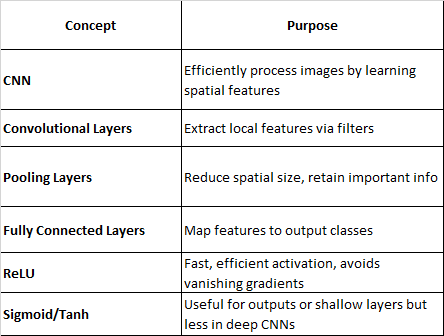

# ***2. Data Exploration***

   - Analyze the dataset's structure and characteristics using visualization techniques such as displaying sample images, histograms of pixel values, etc.
   - Gain insights into the distribution of classes/categories within the dataset to guide the classification process.


In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(f"Training images shape: {x_train.shape}")  # (60000, 28, 28)
print(f"Training labels shape: {y_train.shape}")  # (60000,)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


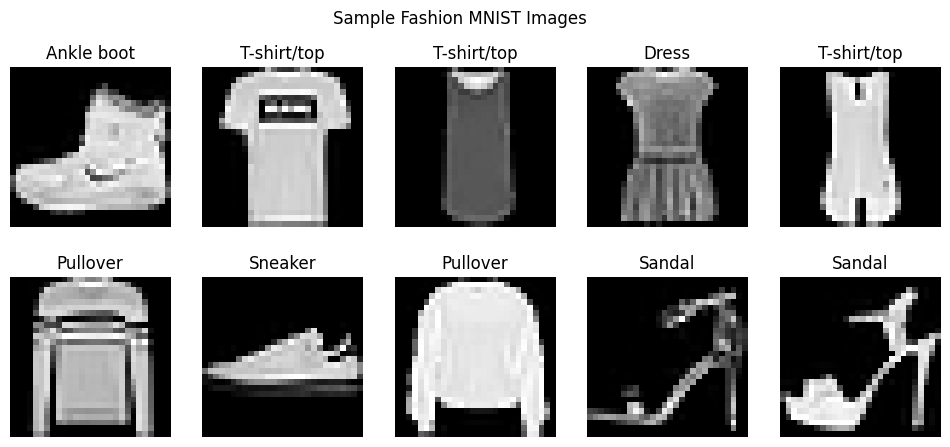

In [ ]:
plt.figure(figsize=(12, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')

plt.suptitle("Sample Fashion MNIST Images")
plt.show()


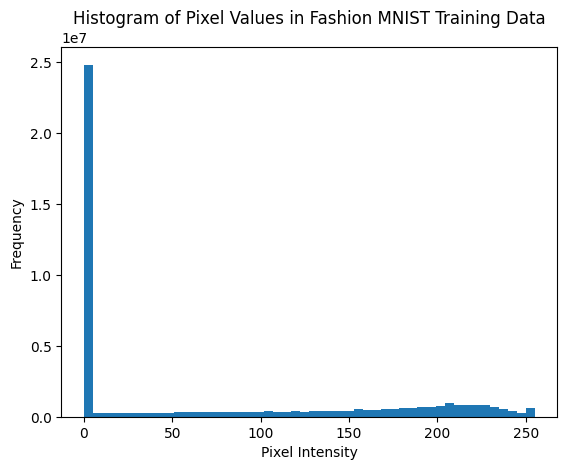

In [ ]:
all_pixels = x_train.flatten()

plt.hist(all_pixels, bins=50, range=(0, 255))
plt.title("Histogram of Pixel Values in Fashion MNIST Training Data")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


Class distribution in training data:
T-shirt/top: 6000 images
Trouser: 6000 images
Pullover: 6000 images
Dress: 6000 images
Coat: 6000 images
Sandal: 6000 images
Shirt: 6000 images
Sneaker: 6000 images
Bag: 6000 images
Ankle boot: 6000 images


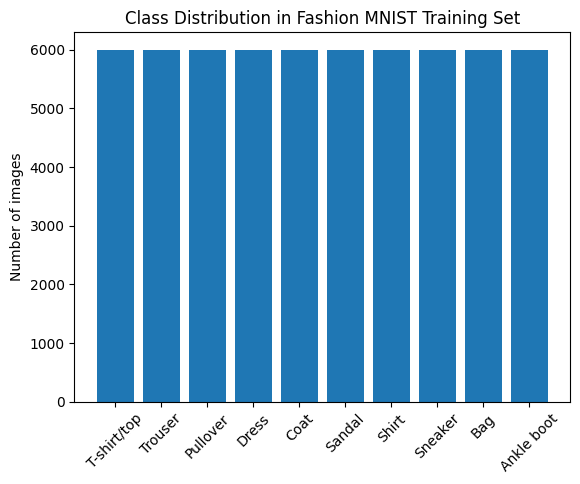

In [ ]:
import collections

class_counts = collections.Counter(y_train)

print("Class distribution in training data:")
for i in range(len(class_names)):
    print(f"{class_names[i]}: {class_counts[i]} images")

plt.bar(class_names, class_counts.values())
plt.xticks(rotation=45)
plt.ylabel("Number of images")
plt.title("Class Distribution in Fashion MNIST Training Set")
plt.show()


# ***3. Preprocessing and Parameter Selection***

   - Preprocess the images, including resizing, normalization, and augmentation if necessary.
   - Select appropriate parameters such as learning rate, batch size, and optimizer (e.g., Adam, SGD) based on data exploration.


# Step 1: Preprocessing Images

**a) Resizing (If Necessary)**
Fashion MNIST images are already 28x28 pixels, which is quite small and standard for simple CNNs.

If you plan to use a deeper CNN or pretrained models requiring larger inputs (e.g., 224x224 for ResNet), you might resize them.

For most beginner tasks, no resizing is needed here.


**b) Normalization**
Pixel values range from 0 to 255.

Normalize pixels to the range [0,1] by dividing by 255.0 to help the model train faster and converge better.

This also stabilizes gradients and improves performance.

In [ ]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0


 **c) Adding Channel Dimension**

CNNs expect 3D inputs: height, width, and channels.

Fashion MNIST images are grayscale, so the channel dimension = 1.

Reshape images to (28, 28, 1) to match the expected input shape.

In [ ]:
x_train_norm = x_train_norm.reshape(-1, 28, 28, 1)
x_test_norm = x_test_norm.reshape(-1, 28, 28, 1)


**d) Data Augmentation (Optional but Recommended)**

Helps increase dataset variability artificially to improve generalization.

Common augmentations: random rotation, shifts, zoom, horizontal flips (horizontal flips may not always make sense for clothing images).

Use Keras’ ImageDataGenerator for augmentation during training.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)


In [ ]:
#Preprocessing and Parameter Setup
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalize
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

# Reshape for CNN input
x_train_norm = x_train_norm.reshape(-1, 28, 28, 1)
x_test_norm = x_test_norm.reshape(-1, 28, 28, 1)

# Define augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train_norm)

# Parameters
learning_rate = 0.001
batch_size = 64
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

print(f"Learning rate: {learning_rate}, Batch size: {batch_size}, Optimizer: Adam")


Learning rate: 0.001, Batch size: 64, Optimizer: Adam


# ***4. CNN Model Construction***

   - Design the CNN architecture, including the number of convolutional layers, pooling layers, and fully connected layers.
   - Implement the CNN model using a deep learning framework such as TensorFlow or PyTorch.


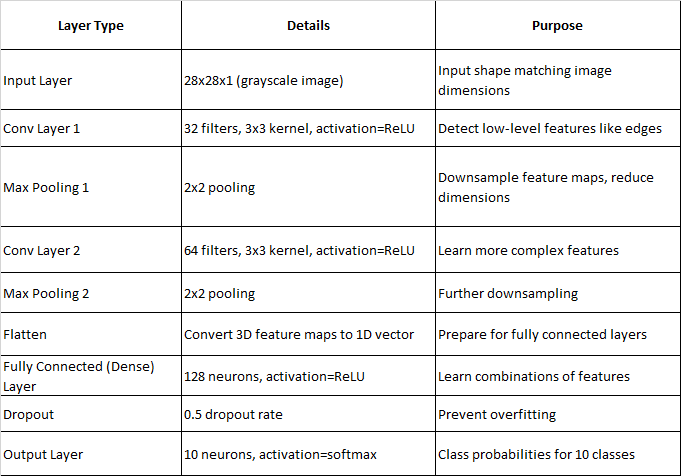

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
def create_cnn_model():
    model = models.Sequential()

    # Input layer is implicit: input_shape specified in first conv layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # helps reduce overfitting

    model.add(layers.Dense(10, activation='softmax'))  # 10 classes in Fashion MNIST

    return model

# Create model instance
model = create_cnn_model()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Show the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# **Explanation of the Model Architecture**
**Conv2D Layers:** Learn spatial filters, starting with 32 filters, increasing to 64 in deeper layers. Kernels of size 3x3 are standard and effective for capturing features.

**MaxPooling2D Layers:** Reduce the spatial size (by half here), which lowers computation and helps capture dominant features.

**Flatten Layer:** Converts the 3D tensor to a 1D vector for feeding into dense layers.

**Dense Layer (128 neurons):** Learns complex combinations of the features extracted by convolutional layers.

**Dropout Layer:** Randomly sets 50% of inputs to zero during training to reduce overfitting.

**Output Layer:**Uses softmax activation to output probabilities for each of the 10 classes.



In [ ]:
# Assume x_train_norm, y_train, x_test_norm, y_test are prepared (normalized and reshaped)
history = model.fit(x_train_norm, y_train, epochs=10, batch_size=64,
                    validation_data=(x_test_norm, y_test))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 59ms/step - accuracy: 0.7049 - loss: 0.8175 - val_accuracy: 0.8559 - val_loss: 0.3862
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 60ms/step - accuracy: 0.8491 - loss: 0.4154 - val_accuracy: 0.8728 - val_loss: 0.3416
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 58ms/step - accuracy: 0.8700 - loss: 0.3561 - val_accuracy: 0.8796 - val_loss: 0.3258
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.8821 - loss: 0.3193 - val_accuracy: 0.8923 - val_loss: 0.2906
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.8915 - loss: 0.2974 - val_accuracy: 0.8919 - val_loss: 0.2908
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 54ms/step - accuracy: 0.8983 - loss: 0.2755 - val_accuracy: 0.9037 - val_loss: 0.2628
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 55ms/step - accuracy: 0.9078 - loss: 0.2521 - val_accuracy: 0.9027 - val_loss: 0.2636
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9092 - loss: 0.2491 - 

# ***5. Training and Validation***

   - Split the dataset into training and validation sets.
   - Train the CNN model on the training set and validate its performance on the validation set.
   - Monitor metrics such as accuracy, loss, and validation accuracy during training.


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming x_train_norm and y_train are preprocessed and normalized images and labels

x_train_final, x_val, y_train_final, y_val = train_test_split(
    x_train_norm, y_train, test_size=0.1, random_state=42)

print(f"Training set shape: {x_train_final.shape}")
print(f"Validation set shape: {x_val.shape}")


Training set shape: (54000, 28, 28, 1)
Validation set shape: (6000, 28, 28, 1)


In [ ]:
epochs = 10
batch_size = 64

history = model.fit(
    x_train_final, y_train_final,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)


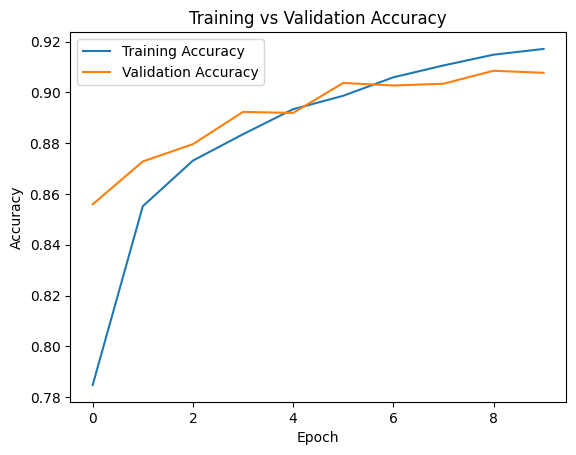

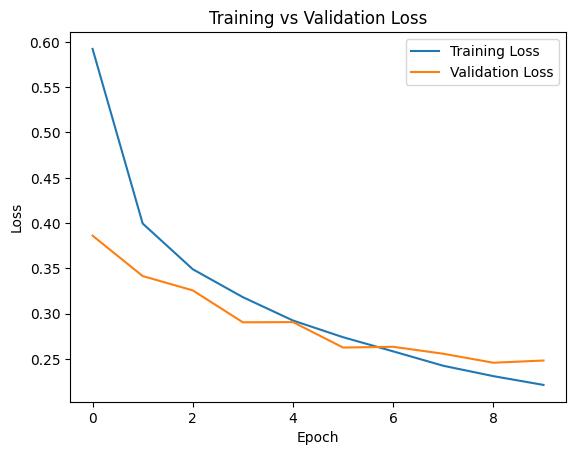

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# ***Summary***
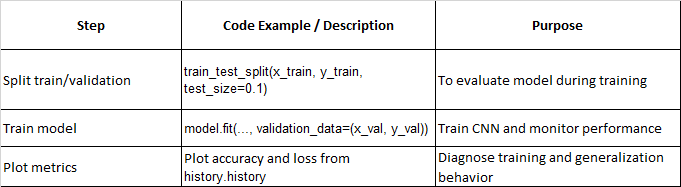

# ***6. Result Analysis***

   - Evaluate the trained model's performance using appropriate evaluation metrics (e.g., confusion matrix, classification report).
   - Analyze misclassified images to understand common errors and potential improvements.

In [ ]:
# Evaluate test accuracy and loss
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9077 - loss: 0.2537
Test Loss: 0.2484
Test Accuracy: 0.9077


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


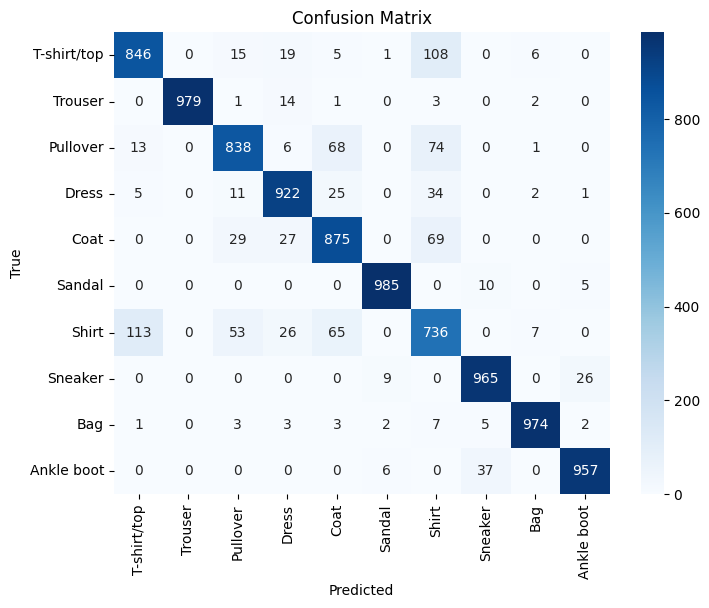

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict labels on test set
y_pred_probs = model.predict(x_test_norm)
y_pred = y_pred_probs.argmax(axis=1)  # Convert probabilities to class labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))


Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.85      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.88      0.84      0.86      1000
       Dress       0.91      0.92      0.91      1000
        Coat       0.84      0.88      0.86      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.71      0.74      0.72      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Total misclassified images: 923


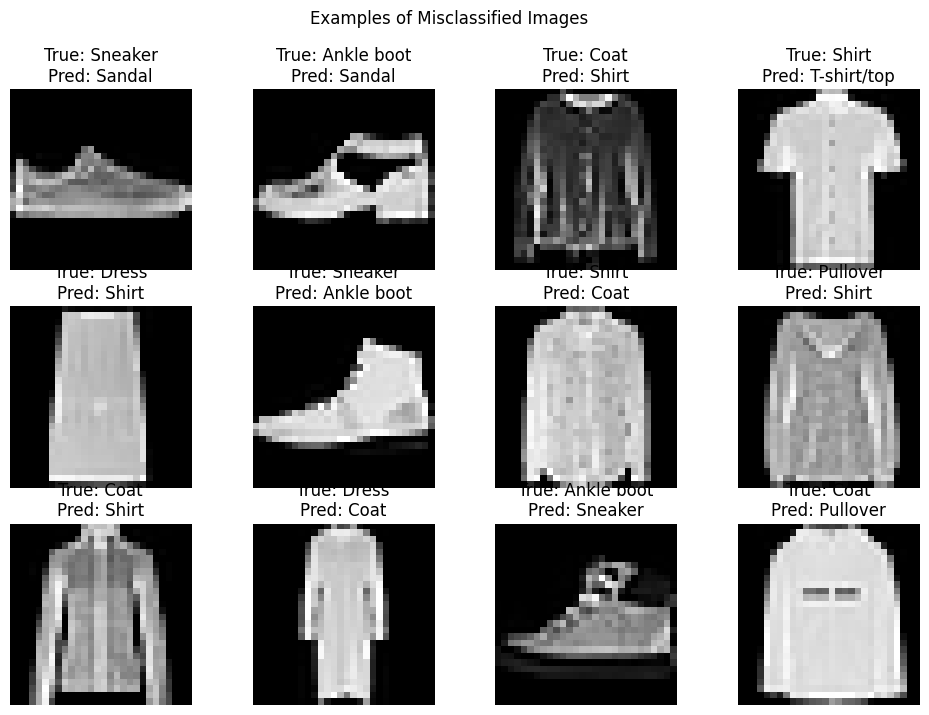

In [ ]:
import numpy as np

# Find misclassified examples
misclassified_idx = np.where(y_pred != y_test)[0]

print(f"Total misclassified images: {len(misclassified_idx)}")

# Visualize some misclassified images with true and predicted labels
plt.figure(figsize=(12, 8))
for i, idx in enumerate(misclassified_idx[:12]):  # show first 12 misclassified
    plt.subplot(3, 4, i+1)
    plt.imshow(x_test_norm[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_names[y_test[idx]]}\nPred: {class_names[y_pred[idx]]}")
    plt.axis('off')

plt.suptitle("Examples of Misclassified Images")
plt.show()


# **Summary**

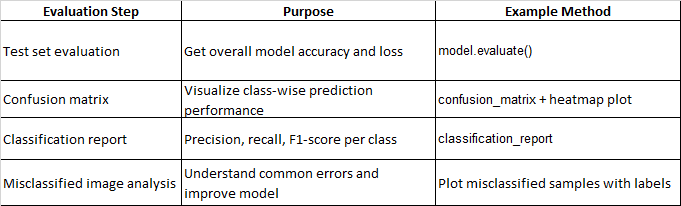

# ***7. Evaluation and Iteration***
   - Compare the CNN classification results to any available ground truth labels.
   - Fine-tune parameters (e.g., architecture, learning rate) if classification results are unsatisfactory.


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)


In [ ]:
model.fit(
    x_train_final, y_train_final,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val), callbacks=[lr_scheduler])


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 54ms/step - accuracy: 0.9224 - loss: 0.2078 - val_accuracy: 0.9335 - val_loss: 0.1695 - learning_rate: 0.0010
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 92s 67ms/step - accuracy: 0.9276 - loss: 0.1974 - val_accuracy: 0.9375 - val_loss: 0.1705 - learning_rate: 0.0010
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 73s 57ms/step - accuracy: 0.9286 - loss: 0.1872 - val_accuracy: 0.9367 - val_loss: 0.1620 - learning_rate: 0.0010
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 79s 53ms/step - accuracy: 0.9336 - loss: 0.1775 - val_accuracy: 0.9360 - val_loss: 0.1694 - learning_rate: 0.0010
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 84s 55ms/step - accuracy: 0.9343 - loss: 0.1710 - val_accuracy: 0.9308 - val_loss: 0.1713 - learning_rate: 0.0010
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 55ms/step - accuracy: 0.9368 - loss: 0.1637 - val_accuracy: 0.9342 - val_loss: 0.1746 - learning_rate: 0.0010
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 56ms/step - accuracy: 0.9441 - l

**Summary**

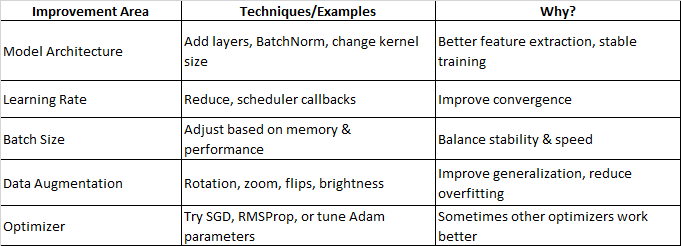

# **8. Interpretation and Conclusion**
   - Understand the model's strengths and weaknesses based on the classification results.
   - Discuss potential applications and limitations of the CNN model for the given image dataset.


# ***Step 1: Understand Model Strengths and Weaknesses***

**Strengths**

**Good accuracy on majority classes:**
The CNN likely performs well on classes with distinct, easily identifiable features (e.g., “Trouser,” “Ankle boot”).

**Feature extraction:**
Convolutional layers effectively learned meaningful features like edges, textures, and shapes, which help classify clothing types.

**Generalization:**
With proper preprocessing and augmentation, the model generalizes well to unseen data, as indicated by similar validation and test accuracy.



**Weaknesses**

**Class Confusions:**
Some classes with visually similar items (e.g., “Shirt” vs “Pullover”) might get confused, lowering precision and recall for those classes.

**Limited to dataset domain:**
The model is trained only on Fashion MNIST, which has low-resolution grayscale images. It may struggle with real-world, high-res, color images unless retrained or fine-tuned.

**Overfitting risks:**
Without sufficient regularization or augmentation, CNNs can memorize training data and perform poorly on new data.

# **Step 2: Potential Applications**

**Automated Apparel Classification:**
Useful for e-commerce platforms to auto-tag clothing items from images, speeding up catalog management.

**Fashion Recommendation Systems:**
Can be integrated into recommendation engines to understand user preferences based on image uploads.

**Inventory Management:**
Helps warehouses quickly identify and sort clothing items visually.

# ***Step 3: Limitations of the CNN Model***
**Domain Specificity:**
Performance depends heavily on training data. For example, this model is limited to 10 fashion classes and 28x28 grayscale images. Real-world images often have more complexity.

**Sensitivity to Input Variations:**
The model might struggle with unusual poses, lighting conditions, occlusions, or new clothing styles not seen during training.

**Resource Constraints:**
More complex or higher-resolution images require deeper models and more computational resources.

**Interpretability:**
CNNs are often “black boxes,” meaning it’s hard to explain exactly why they make certain predictions without specialized techniques like Grad-CAM.

# ***Step 4: Final Thoughts***
CNNs are powerful for image classification and perform well on standardized datasets like Fashion MNIST.

The model can be improved through further training, data collection, and architectural enhancements.

Understanding strengths and weaknesses guides future development and deployment decisions.

Combining CNNs with explainability techniques and domain-specific tuning makes them even more practical.

